# Titanic - Machine learning from disaster

In this notebook, we are participating in a kaggle competition, Titanic - Machine learning from disaster, *Will Cukierski. Titanic - Machine Learning from Disaster. https://kaggle.com/competitions/titanic, 2012. Kaggle.* and creating a model to solve a classification problem.

## Problem Definition

> "what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

## Data

The data is downloaded from the competition site, https://www.kaggle.com/competitions/titanic/data.

**Overview**

The data has been split into two groups:

* training set (`train.csv`)
* test set (`test.csv`)

`Train.csv` will contain the details of a subset of the passengers on board (891 to be exact) and importantly, will reveal whether they survived or not, also known as the “**ground truth**”.

The `test.csv` dataset contains similar information but does not disclose the “ground truth” for each passenger. It’s your job to predict these outcomes.

## Evaluation

**Goal**

>It is your job to predict if a passenger survived the sinking of the Titanic or not.
For each in the test set, you must predict a 0 or 1 value for the variable.

**Metric**

Your score is the percentage of passengers you correctly predict. This is known as accuracy.

**Submission File Format**

You should submit a csv file with exactly 418 entries plus a header row. Your submission will show an error if you have extra columns (beyond PassengerId and Survived) or rows.

The file should have exactly 2 columns:

* `PassengerId` (sorted in any order)
* `Survived` (contains your binary predictions: 1 for survived, 0 for deceased)


## Features

**Data Dictionary**

Variable	Definition	Key

* survival = Survival (0 = No, 1 = Yes)
* pclass = Ticket class	(1 = 1st, 2 = 2nd, 3 = 3rd)
* sex = Sex	
* Age =	Age in years	
* sibsp = # of siblings / spouses aboard the Titanic	
* parch = # of parents / children aboard the Titanic	
* ticket = Ticket number	
* fare = Passenger fare	
* cabin	=  Cabin number	
* embarked = Port of Embarkation	(C = Cherbourg, Q = Queenstown, S = Southampton)


**Variable Notes**

* pclass: A proxy for socio-economic status (SES)
    * 1st = Upper
    * 2nd = Middle
    * 3rd = Lower
* age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
* sibsp: The dataset defines family relations in this way...
* Sibling = brother, sister, stepbrother, stepsister
* Spouse = husband, wife (mistresses and fiancés were ignored)
* parch: The dataset defines family relations in this way...
* Parent = mother, father
* Child = daughter, son, stepdaughter, stepson
    * Some children travelled only with a nanny, therefore parch=0 for them.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

In [2]:
# Import the training data
df = pd.read_csv("data/train.csv")

In [3]:
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age has a 177 null values and Cabin has 687 null values

Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


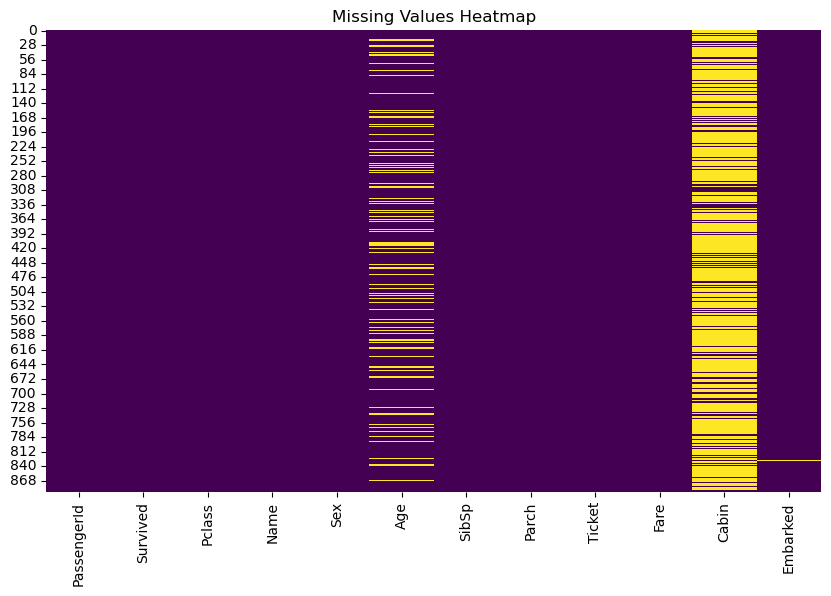

In [6]:
# Check missing values
missing = df.isnull().sum()
print("Missing Values:\n", missing)

# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

In [7]:
df.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

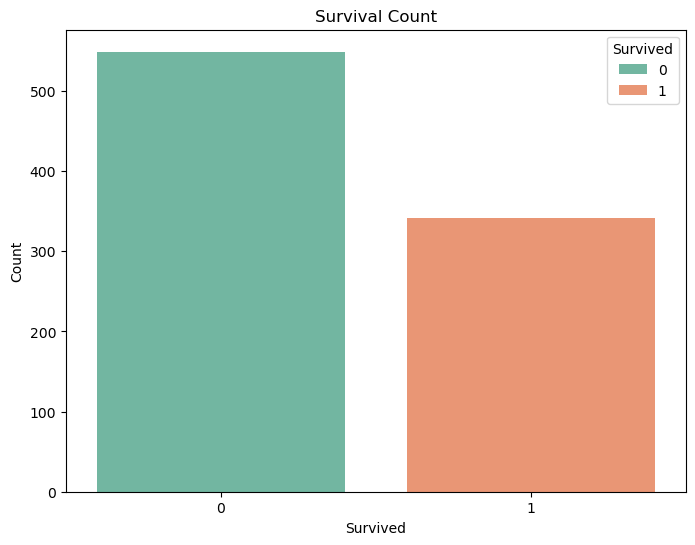

In [8]:
# Survival Count
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Survived', palette='Set2', hue='Survived')
plt.title("Survival Count")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()

In [9]:
df.Sex.value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

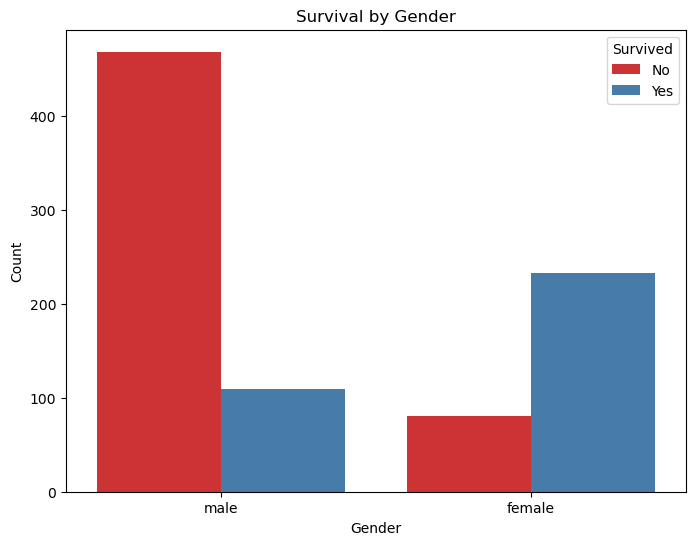

In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Sex', hue='Survived', palette='Set1')
plt.title("Survival by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()

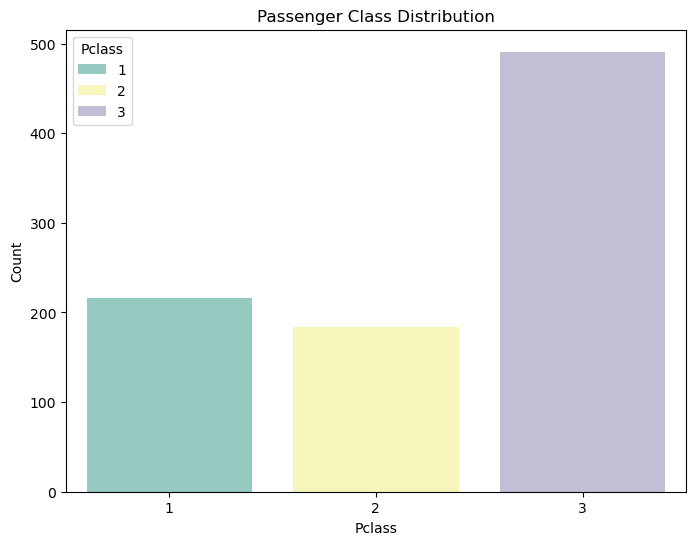

In [11]:
# Passenger Class Count
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Pclass', palette='Set3', hue='Pclass')
plt.title("Passenger Class Distribution")
plt.xlabel("Pclass")
plt.ylabel("Count")
plt.show()

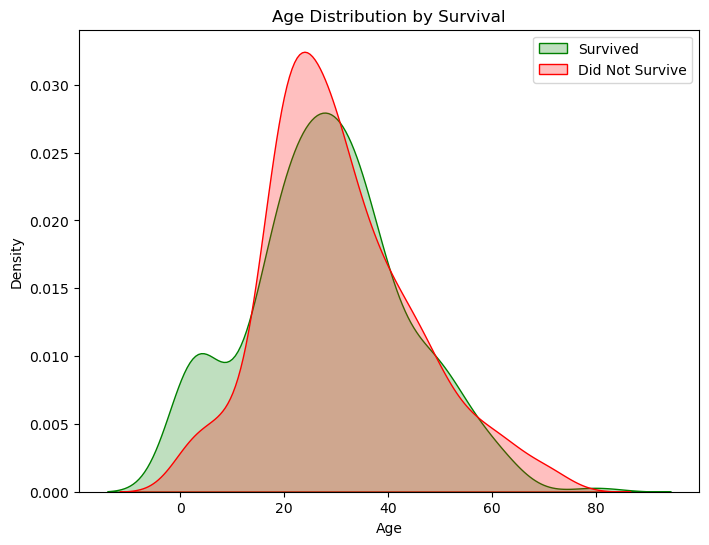

In [12]:
# Age distribution by Survival
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df[df['Survived'] == 1]['Age'], label="Survived", color='green', fill=True)
sns.kdeplot(data=df[df['Survived'] == 0]['Age'], label="Did Not Survive", color='red', fill=True)
plt.title("Age Distribution by Survival")
plt.xlabel("Age")
plt.legend()
plt.show()

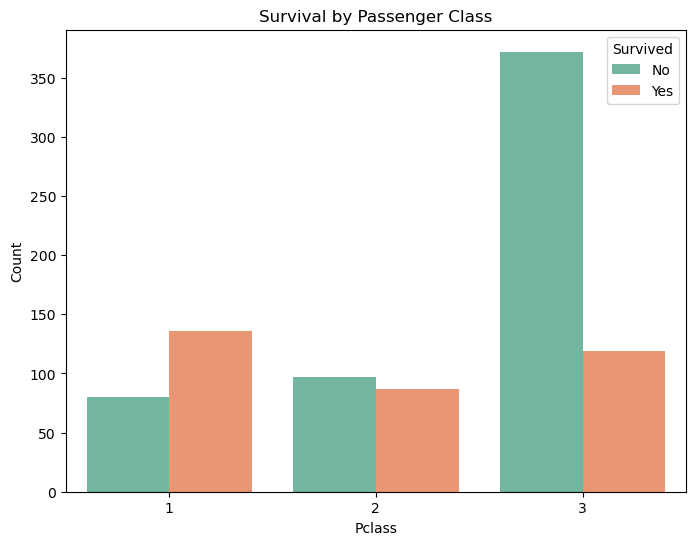

In [13]:
# Survival distribution based on Passenger class
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Pclass', hue='Survived', palette='Set2')
plt.title("Survival by Passenger Class")
plt.xlabel("Pclass")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()

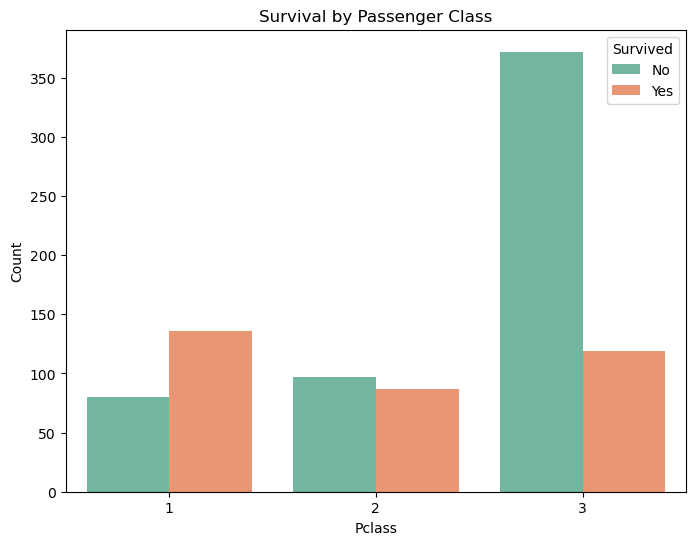

In [14]:
# Survival distribution based on Passenger class
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Pclass', hue='Survived', palette='Set2')
plt.title("Survival by Passenger Class")
plt.xlabel("Pclass")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()

**Making a copy of the data**

In [15]:
# making a cooy of original df
df_c = df.copy()

### Feature Engineering

In [16]:
df_c

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [17]:
# drop the columns that are not informative
df_c.drop(['Name', 'Ticket', 'Fare'],  axis=1, inplace=True)

In [18]:
df_c.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Cabin          687
Embarked         2
dtype: int64

In [19]:
# Fill the missing age values with the median of the columns
for label, content in df_c.items():
    if label == 'Age' :
        df_c['Age_is_missing'] = pd.isnull(content)

df_c['Age'].fillna(df_c['Age'].median(), inplace=True)

In [20]:
# Fill the missing cabin values with the value 'Unknown'
for label, content in df_c.items():
    if label == 'Cabin' :
        df_c['Cabin_is_missing'] = pd.isnull(content)

df_c['Cabin'].fillna('Unknown', inplace=True)

In [21]:
# Turning Embarked into numerical values using pd.Categorical
df_c.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [22]:
df_c['Embarked'] = pd.Categorical(df_c['Embarked']).codes + 1

In [23]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PassengerId       891 non-null    int64  
 1   Survived          891 non-null    int64  
 2   Pclass            891 non-null    int64  
 3   Sex               891 non-null    object 
 4   Age               891 non-null    float64
 5   SibSp             891 non-null    int64  
 6   Parch             891 non-null    int64  
 7   Cabin             891 non-null    object 
 8   Embarked          891 non-null    int8   
 9   Age_is_missing    891 non-null    bool   
 10  Cabin_is_missing  891 non-null    bool   
dtypes: bool(2), float64(1), int64(5), int8(1), object(2)
memory usage: 58.4+ KB


In [24]:
df_c.Cabin.value_counts()

Cabin
Unknown        687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: count, Length: 148, dtype: int64

In [25]:
df_c.isna().sum()

PassengerId         0
Survived            0
Pclass              0
Sex                 0
Age                 0
SibSp               0
Parch               0
Cabin               0
Embarked            0
Age_is_missing      0
Cabin_is_missing    0
dtype: int64

In [26]:
# Turn the other object columns into numerical using pd.Categorical
df_c['Cabin'] = pd.Categorical(df_c['Cabin']).codes + 1
df_c['Sex'] = pd.Categorical(df_c['Sex']).codes + 1

In [27]:
df_c

PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch  Cabin  Embarked  \
0              1         0       3    2  22.0      1      0    148         3   
1              2         1       1    1  38.0      1      0     82         1   
2              3         1       3    1  26.0      0      0    148         3   
3              4         1       1    1  35.0      1      0     56         3   
4              5         0       3    2  35.0      0      0    148         3   
..           ...       ...     ...  ...   ...    ...    ...    ...       ...   
886          887         0       2    2  27.0      0      0    148         3   
887          888         1       1    1  19.0      0      0     31         3   
888          889         0       3    1  28.0      1      2    148         3   
889          890         1       1    2  26.0      0      0     61         1   
890          891         0       3    2  32.0      0      0    148         2   

     Age_is_missing  Cabin_is_missing  
0             False              True  
1             False             False  
2             False              True  
3             False             False  
4             False              True  
..              ...               ...  
886           False              True  
887           False             False  
888            True              True  
889           False             False  
890           False              True  

[891 rows x 11 columns]

In [28]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PassengerId       891 non-null    int64  
 1   Survived          891 non-null    int64  
 2   Pclass            891 non-null    int64  
 3   Sex               891 non-null    int8   
 4   Age               891 non-null    float64
 5   SibSp             891 non-null    int64  
 6   Parch             891 non-null    int64  
 7   Cabin             891 non-null    int16  
 8   Embarked          891 non-null    int8   
 9   Age_is_missing    891 non-null    bool   
 10  Cabin_is_missing  891 non-null    bool   
dtypes: bool(2), float64(1), int16(1), int64(5), int8(2)
memory usage: 47.1 KB


Let's build a correlation table before building the model

In [29]:
df_c.corr()

PassengerId  Survived    Pclass       Sex       Age  \
PassengerId          1.000000 -0.005007 -0.035144  0.042939  0.034212   
Survived            -0.005007  1.000000 -0.338481 -0.543351 -0.064910   
Pclass              -0.035144 -0.338481  1.000000  0.131900 -0.339898   
Sex                  0.042939 -0.543351  0.131900  1.000000  0.081163   
Age                  0.034212 -0.064910 -0.339898  0.081163  1.000000   
SibSp               -0.057527 -0.035322  0.083081 -0.114631 -0.233296   
Parch               -0.001652  0.081629  0.018443 -0.245489 -0.172482   
Cabin               -0.035077 -0.254888  0.684121  0.096681 -0.240839   
Embarked             0.012985 -0.176509  0.173511  0.118492 -0.031903   
Age_is_missing      -0.020167 -0.092197  0.172933  0.055215 -0.052098   
Cabin_is_missing    -0.019919 -0.316912  0.725541  0.140391 -0.240314   

                     SibSp     Parch     Cabin  Embarked  Age_is_missing  \
PassengerId      -0.057527 -0.001652 -0.035077  0.012985       -0.020167   
Survived         -0.035322  0.081629 -0.254888 -0.176509       -0.092197   
Pclass            0.083081  0.018443  0.684121  0.173511        0.172933   
Sex              -0.114631 -0.245489  0.096681  0.118492        0.055215   
Age              -0.233296 -0.172482 -0.240839 -0.031903       -0.052098   
SibSp             1.000000  0.414838  0.043593  0.071480        0.018958   
Parch             0.414838  1.000000 -0.028324  0.043351       -0.124104   
Cabin             0.043593 -0.028324  1.000000  0.225969        0.110419   
Embarked          0.071480  0.043351  0.225969  1.000000       -0.146888   
Age_is_missing    0.018958 -0.124104  0.110419 -0.146888        1.000000   
Cabin_is_missing  0.040460 -0.036987  0.828558  0.173895        0.144111   

                  Cabin_is_missing  
PassengerId              -0.019919  
Survived                 -0.316912  
Pclass                    0.725541  
Sex                       0.140391  
Age                      -0.240314  
SibSp                     0.040460  
Parch                    -0.036987  
Cabin                     0.828558  
Embarked                  0.173895  
Age_is_missing            0.144111  
Cabin_is_missing          1.000000

Now that we don't have any null values and everything is numerical,  we are ready to build the model.

**Splitting the data**

let's split the data into train and valid before we do any transformations to the dataframe

In [30]:
# Splitting data into Train and Valid
split = round(0.8 * len(df_c)) # 80% of the data

# Split the data into train and valid
train_df, valid_df = train_test_split(df_c, test_size=0.2, random_state=42)

In [31]:
train_df.shape, valid_df.shape

((712, 11), (179, 11))

In [32]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 331 to 102
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PassengerId       712 non-null    int64  
 1   Survived          712 non-null    int64  
 2   Pclass            712 non-null    int64  
 3   Sex               712 non-null    int8   
 4   Age               712 non-null    float64
 5   SibSp             712 non-null    int64  
 6   Parch             712 non-null    int64  
 7   Cabin             712 non-null    int16  
 8   Embarked          712 non-null    int8   
 9   Age_is_missing    712 non-null    bool   
 10  Cabin_is_missing  712 non-null    bool   
dtypes: bool(2), float64(1), int16(1), int64(5), int8(2)
memory usage: 43.1 KB


In [33]:
train_df.isna().sum()

PassengerId         0
Survived            0
Pclass              0
Sex                 0
Age                 0
SibSp               0
Parch               0
Cabin               0
Embarked            0
Age_is_missing      0
Cabin_is_missing    0
dtype: int64

In [34]:
valid_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179 entries, 709 to 10
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PassengerId       179 non-null    int64  
 1   Survived          179 non-null    int64  
 2   Pclass            179 non-null    int64  
 3   Sex               179 non-null    int8   
 4   Age               179 non-null    float64
 5   SibSp             179 non-null    int64  
 6   Parch             179 non-null    int64  
 7   Cabin             179 non-null    int16  
 8   Embarked          179 non-null    int8   
 9   Age_is_missing    179 non-null    bool   
 10  Cabin_is_missing  179 non-null    bool   
dtypes: bool(2), float64(1), int16(1), int64(5), int8(2)
memory usage: 10.8 KB


In [35]:
valid_df.isna().sum()

PassengerId         0
Survived            0
Pclass              0
Sex                 0
Age                 0
SibSp               0
Parch               0
Cabin               0
Embarked            0
Age_is_missing      0
Cabin_is_missing    0
dtype: int64

Awesome! Now let's split the data and do some predictions on this dataframe

## Modelling

In [36]:
# Split valid_df into x_valid and y_valid
x_valid = valid_df.drop('Survived', axis=1)
y_valid = valid_df['Survived']

In [37]:
%%time
# Split training set into x_train and y_train
x_train = train_df.drop('Survived', axis=1)
y_train = train_df['Survived']

# Instantiate the model
clf = RandomForestClassifier(n_jobs=-1, random_state=42) # Random state to reproduce data

# Fit the model
clf.fit(x_train, y_train)

CPU times: total: 609 ms
Wall time: 381 ms


RandomForestClassifier(n_jobs=-1, random_state=42)

In [38]:
clf.score(x_valid, y_valid)

0.8212290502793296

Let's try other models

In [39]:
from sklearn.neighbors import KNeighborsClassifier

clf_neigh = KNeighborsClassifier(n_jobs=-1, n_neighbors=15)

clf_neigh.fit(x_train, y_train)

clf_neigh.score(x_valid, y_valid)

0.6424581005586593

In [40]:
from sklearn.linear_model import LinearRegression

clf_lr = LinearRegression(n_jobs=-1)

clf_lr.fit(x_train, y_train)

clf_lr.score(x_valid, y_valid)

0.4345191163853105

In [41]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(x_train, y_train)

gnb.score(x_valid, y_valid)

0.7541899441340782

In [42]:
from sklearn import svm

clf_svc = svm.SVC()

clf_svc.fit(x_train, y_train)

clf_svc.score(x_valid, y_valid)

0.6312849162011173

In [43]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=5)
tree.fit(x_train, y_train)
tree.score(x_valid, y_valid)

0.776536312849162

In [44]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)
gb.fit(x_train, y_train)

gb.score(x_valid, y_valid)

0.7877094972067039

Looking at the above model, the models with good performances are `GradientBoostingClassifier()`, `DecisionTreeClassifier()` and `RandomForestClassifier()`

Now let's do some hyperparameter tuning on the best performing models

Trying RandomizedSearchCV on RandomForestClassifier

In [45]:
# Parameter distribution grid
param_distributions = {
    'n_estimators': np.arange(50, 501, 50),   # Number of trees: 50 to 500, step 50
    'max_depth': np.arange(5, 51, 5),         # Tree depth: 5 to 50, step 5
    'min_samples_split': np.arange(2, 21, 2), # Min samples to split: 2 to 20, step 2
    'min_samples_leaf': np.arange(1, 21, 2),  # Min samples in leaf: 1 to 20, step 2
    'max_features': ['sqrt', 'log2', None],   # Number of features to consider at each split
    'bootstrap': [True, False],               # Whether to use bootstrap samples
    'criterion': ['gini', 'entropy', 'log_loss']  # Function to measure split quality
}

In [46]:
%%time
rs_clf = RandomizedSearchCV(RandomForestClassifier(),
                            param_distributions,
                            n_iter=100,
                            n_jobs=-1,
                            cv=5,
                            verbose=True,
                            random_state=42
                           )
rs_clf.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
CPU times: total: 2.45 s
Wall time: 1min 15s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]),
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20]),
                                        'n_estimators': array([ 50, 100, 150, 200, 250, 300, 350, 400, 450, 500])},
                   random_state=42, verbose=True)

In [47]:
rs_clf.best_params_

{'n_estimators': 100,
 'min_samples_split': 12,
 'min_samples_leaf': 3,
 'max_features': 'sqrt',
 'max_depth': 5,
 'criterion': 'entropy',
 'bootstrap': False}

In [48]:
rs_clf.score(x_valid, y_valid)

0.8100558659217877

In [49]:
# After some tweaking with the RansomizedSearchCv, I found better values
clf2 = RandomForestClassifier(n_estimators=400,
                              min_samples_split=10,
                              min_samples_leaf=5,
                              max_features=None,
                              max_depth=40,
                              n_jobs=-1,
                              random_state=42
                             )

clf2.fit(x_train, y_train)

clf2.score(x_valid, y_valid)

0.8156424581005587

**RandomizedSearchCV for Decision Tree**

In [50]:
# Parameter distribution grid for DecisionTreeClassifier
param_distributions_dt = {
    'max_depth': np.arange(5, 51, 5),         # Tree depth: 5 to 50, step 5
    'min_samples_split': np.arange(2, 21, 2), # Min samples to split: 2 to 20, step 2
    'min_samples_leaf': np.arange(1, 21, 2),  # Min samples in leaf: 1 to 20, step 2
    'criterion': ['gini', 'entropy', 'log_loss'],  # Split quality function
    'splitter': ['best', 'random']            # Strategy used to choose the split
}

In [51]:
%%time
# Example usage with RandomizedSearchCV
rs_dt = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(),
    param_distributions=param_distributions_dt,
    n_iter=100,
    scoring='accuracy',
    cv=5,
    random_state=42,
    verbose=2,
    n_jobs=-1
)

rs_dt.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
CPU times: total: 609 ms
Wall time: 1.3 s


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]),
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20]),
                                        'splitter': ['best', 'random']},
                   random_state=42, scoring='accuracy', verbose=2)

In [52]:
rs_dt.best_params_

{'splitter': 'best',
 'min_samples_split': 6,
 'min_samples_leaf': 9,
 'max_depth': 5,
 'criterion': 'gini'}

In [53]:
rs_dt.score(x_valid, y_valid)

0.8268156424581006

**GridSearch for Descision Tree Classifier**

In [54]:
# Define the parameter grid to tune the hyperparameters
param_grid = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [55]:
from sklearn.model_selection import GridSearchCV

dtree_reg = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=dtree_reg, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=2)

In [56]:
grid_search.score(x_valid, y_valid)

0.7877094972067039

**RandomSearchCv for GradientBoostingClassifier()**

In [57]:
# Parameter distribution grid for GradientBoostingClassifier
param_distributions_gb = {
    'n_estimators': np.arange(50, 501, 50),   # Number of boosting stages: 50 to 500, step 50
    'learning_rate': np.arange(0.01, 0.31, 0.05), # Learning rate: 0.01 to 0.30, step 0.05
    'max_depth': np.arange(3, 21, 2),         # Tree depth: 3 to 20, step 2
    'min_samples_split': np.arange(2, 21, 2), # Min samples to split: 2 to 20, step 2
    'min_samples_leaf': np.arange(1, 21, 2),  # Min samples in leaf: 1 to 20, step 2
    'subsample': np.arange(0.6, 1, 0.1),    # Fraction of samples used for fitting: 0.6 to 1.0
    'max_features': ['sqrt', 'log2', None]    # Number of features considered at each split
}

In [58]:
# Example usage with RandomizedSearchCV
rs_gb = RandomizedSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_distributions=param_distributions_gb,
    n_iter=100,
    scoring='accuracy',
    cv=5,
    random_state=42,
    verbose=2,
    n_jobs=-1
)

rs_gb.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'learning_rate': array([0.01, 0.06, 0.11, 0.16, 0.21, 0.26]),
                                        'max_depth': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20]),
                                        'n_estimators': array([ 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]),
                                        'subsample': array([0.6, 0.7, 0.8, 0.9])},
                   random_state=42, scoring='accuracy', verbose=2)

In [59]:
rs_gb.best_params_

{'subsample': 0.7,
 'n_estimators': 50,
 'min_samples_split': 14,
 'min_samples_leaf': 15,
 'max_features': 'log2',
 'max_depth': 17,
 'learning_rate': 0.060000000000000005}

In [60]:
rs_gb.score(x_valid, y_valid)

0.8268156424581006

In [61]:
# based on some several results
gb_clf = GradientBoostingClassifier(n_estimators=110, 
                                    learning_rate=1.0, 
                                    max_depth=1,
                                    min_samples_leaf=1,
                                    subsample=1,
                                    random_state=42
                                   )
gb_clf.fit(x_train, y_train)
gb_clf.score(x_valid, y_valid)

0.7932960893854749

**Trying gridsearch for gb classifier()**

In [62]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
}

In [63]:
# Initialize GridSearchCV
gs_gb = GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model to the training data using GridSearchCV
gs_gb.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [64]:
gs_gb.best_params_

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}

In [65]:
gs_gb.score(x_valid, y_valid)

0.8100558659217877

In [66]:
# based on some several results
gs_gb_clf = GradientBoostingClassifier(n_estimators=110, 
                                    learning_rate=1.0, 
                                    max_depth=1,
                                    min_samples_leaf=1,
                                    subsample=1,
                                    random_state=42
                                   )
gs_gb_clf.fit(x_train, y_train)
gs_gb_clf.score(x_valid, y_valid)

0.7932960893854749

## Performing Final Predictions

In [67]:
# Import test data
test_df = pd.read_csv('data/test.csv')

# Performing transformations on test_df

# drop the columns that are not informative
test_df.drop(['Name', 'Ticket', 'Fare'],  axis=1, inplace=True)

# Fill the missing age values with the median of the columns
for label, content in test_df.items():
    if label == 'Age' :
        test_df['Age_is_missing'] = pd.isnull(content)

test_df['Age'].fillna(test_df['Age'].median(), inplace=True)

# Fill the missing cabin values with the value 'Unknown'
for label, content in test_df.items():
    if label == 'Cabin' :
        test_df['Cabin_is_missing'] = pd.isnull(content)

test_df['Cabin'].fillna('Unknown', inplace=True)
test_df['Embarked'] = pd.Categorical(test_df['Embarked']).codes + 1

# Turn the other object columns into numerical using pd.Categorical
test_df['Cabin'] = pd.Categorical(test_df['Cabin']).codes + 1
test_df['Sex'] = pd.Categorical(test_df['Sex']).codes + 1

In [68]:
test_df.isna().sum()

PassengerId         0
Pclass              0
Sex                 0
Age                 0
SibSp               0
Parch               0
Cabin               0
Embarked            0
Age_is_missing      0
Cabin_is_missing    0
dtype: int64

In [69]:
y_preds = rs_dt.predict(test_df)

In [70]:
y_preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [71]:
output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': y_preds})
output.to_csv('data/submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [72]:
output

PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         0
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]